**Libraries**

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

**Clean data**

In [2]:
data = pd.read_csv('austin_weather.csv')

# drop unnecessary columns
data = data.drop(['Events',
                  'Date',
                  'SeaLevelPressureHighInches',
                  'SeaLevelPressureLowInches'],
                 axis = 1)

data = data.replace('T', 0.0)   # replace trace rainfall with 0
data = data.replace('-', 0.0)   # replace the missing values with 0

# save data in a new file
data.to_csv('austin_cleaned.csv')

**Main**

In [10]:
data = pd.read_csv('austin_cleaned.csv')

X = data.drop(['PrecipitationSumInches'], axis = 1)

Y = data['PrecipitationSumInches']
Y = Y.values.reshape(-1, 1)

day_index = 798
days = [i for i in range(Y.size)]

clf = LinearRegression()
clf.fit(X, Y)

input = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                    [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])

input = input.reshape(1, -1)

print('The precipitation in inches for the input is:', clf.predict(input))

The precipitation in inches for the input is: [[1.33868402]]


/home/hnngn/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


The precipitation trend graph: 


Text(0, 0.5, 'Precipitation in inches')

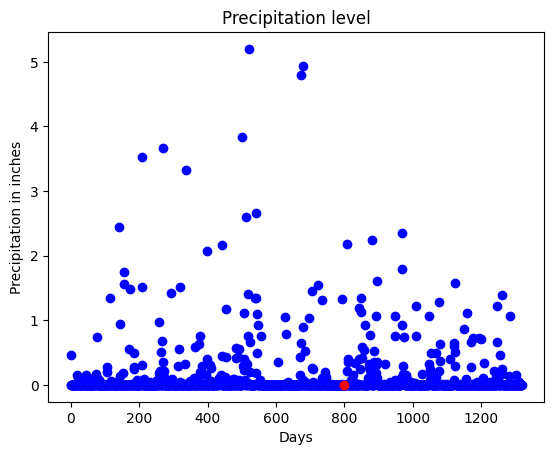

In [13]:
print('The precipitation trend graph: ')

plt.scatter(days, Y, color = 'b')
plt.scatter(days[day_index], Y[day_index], color = 'r')
plt.title('Precipitation level')
plt.xlabel('Days')
plt.ylabel('Precipitation in inches')

Precipitation vs selected attributes graph: 


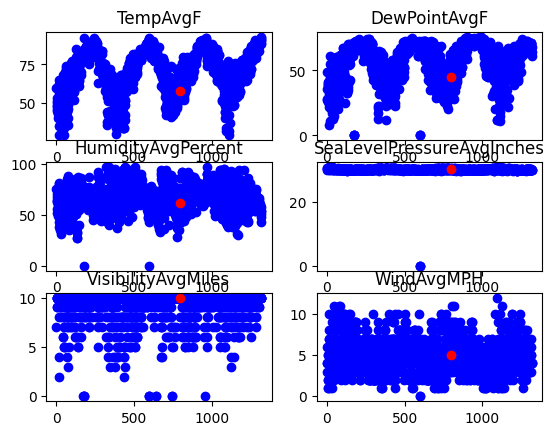

In [11]:
x_f = X.filter(['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent',
                'SeaLevelPressureAvgInches', 'VisibilityAvgMiles',
                'WindAvgMPH'], axis = 1)

print('Precipitation vs selected attributes graph: ')
for i in range(x_f.columns.size):
    plt.subplot(3, 2, i + 1)
    plt.scatter(days, x_f[x_f.columns.values[i][:100]], color = 'b')
    plt.scatter(days[day_index], x_f[x_f.columns.values[i]][day_index], color = 'r')
    plt.title(x_f.columns.values[i])

In [14]:
# Convert Precipitation to binary (1 if Precipitation > 0 else 0)
y_binary = np.where(Y > 0, 1, 0)

# Perform train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.2, random_state=42)

In [15]:
# Training the Linear Regression Model
clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [18]:
# Predicting the values of the testing set
Y_pred = clf.predict(X_test)

# Calculating the R^2 score
r_square_score = clf.score(X_test, y_test)
print('The R^2 score of the model is:', r_square_score)

The R^2 score of the model is: 0.5263715806297862


In [19]:
# Making a prediction
inp = np.array([[74], [60], [45], [67], [49], [43], [33], [45],
                [57], [29.68], [10], [7], [2], [0], [20], [4], [31]])
inp = inp.reshape(1, -1)

# Print output
print('The precipitation in inches for the input is:', clf.predict(inp))

The precipitation in inches for the input is: [[2.07473763]]


/home/hnngn/.local/lib/python3.10/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [20]:
# Implementing Logistic Regression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model with increased max_iter and changed solver
log_reg = LogisticRegression(solver='liblinear', max_iter=1000)

# Fit Model
log_reg.fit(X_train_scaled, y_train.ravel())

# Predict using the scaled test data
y_pred = log_reg.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[184  18]
 [ 12  50]]
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       202
           1       0.74      0.81      0.77        62

    accuracy                           0.89       264
   macro avg       0.84      0.86      0.85       264
weighted avg       0.89      0.89      0.89       264



In [21]:
# Model Evaluation using Cross-Validation
from sklearn.model_selection import cross_val_score

X_scaled = scaler.transform(X)

# Calculate cross_val_score
scores = cross_val_score(log_reg, X_scaled, y_binary.ravel(), cv=5)

print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.89 (+/- 0.04)


In [23]:
# Implementing Ridge Regression
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1.0)
ridge_reg.fit(X_train, y_train)

# Predicting and Evaluating
y_pred_ridge = ridge_reg.predict(X_test)

# Implementing Neural Network
from sklearn.neural_network import MLPClassifier

nn_model = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)

# Scaling the training and testing data
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

nn_model.fit(X_train_scaled, y_train.ravel())  # use ravel() to avoid DataConversionWarning

# Predicting and Evaluating
y_pred_nn = nn_model.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))

[[185  17]
 [ 11  51]]
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       202
           1       0.75      0.82      0.78        62

    accuracy                           0.89       264
   macro avg       0.85      0.87      0.86       264
weighted avg       0.90      0.89      0.90       264



/home/hnngn/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
